In [1]:
import pandas as pd
import os
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
results_dir = os.path.join('..', "data","bids-events-files")

results_dir

'../data/bids-events-files'

In [3]:
runs = ('1', '2', '3', '4')

events_list = [f for f in os.listdir(results_dir) if any(f.endswith(f'task-01c_run-{run}_events.tsv') for run in runs)]

labels_df = pd.DataFrame(columns=['db_labels','p_labels'])

for file in events_list:

    df = pd.read_csv(os.path.join(results_dir, file), sep='\t')

    #For each file, remove rows where pd.read_csv(file)['trial_type'].isin('Baseline','Noise')
    df = df[~df['trial_type'].isin(['Baseline','Noise'])]
    
    # Create arrays for true_values and predictions
    db_labels = (df.loc[df['trial_type'].str.endswith('_db'), 'trial_type']).str.replace('_db', '')
    p_labels = (df.loc[df['trial_type'].str.endswith('_p'), 'trial_type']).str.replace('_p', '')

    #Convert arrays to dataframes and concatenate
    run_labels_df = pd.DataFrame({'db_labels': db_labels.values, 'p_labels': p_labels.values})

    labels_df = pd.concat([labels_df, run_labels_df], ignore_index=True,axis=0)



In [10]:
len(events_list) / 4

19.0

### Normalized Confusion Matrix

Text(0, 0.5, 'Database Labels')

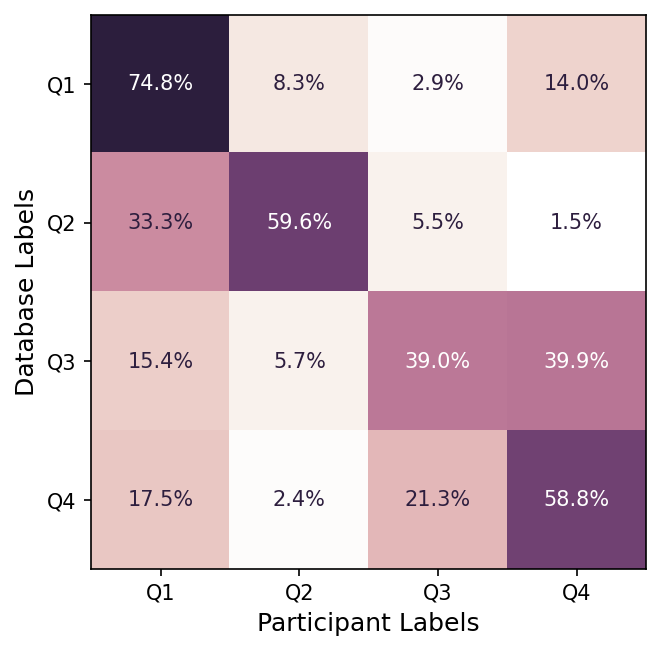

In [8]:
fig, ax = plt.subplots( dpi = 150)  

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
#cmap = sns.color_palette("PRGn", as_cmap=True)

cm_display = ConfusionMatrixDisplay.from_predictions(labels_df['db_labels'],  labels_df['p_labels'], cmap=cmap, colorbar=False, ax = ax,normalize='true',values_format='.1%')

# Adjust font size for label names
cm_display.ax_.tick_params(axis='both', labelsize=10)

# Adjust font size for axis labels
cm_display.ax_.set_xlabel('Participant Labels', fontsize=12)
cm_display.ax_.set_ylabel('Database Labels', fontsize=12)


### Absolute Values CM

Text(0, 0.5, 'Database Labels')

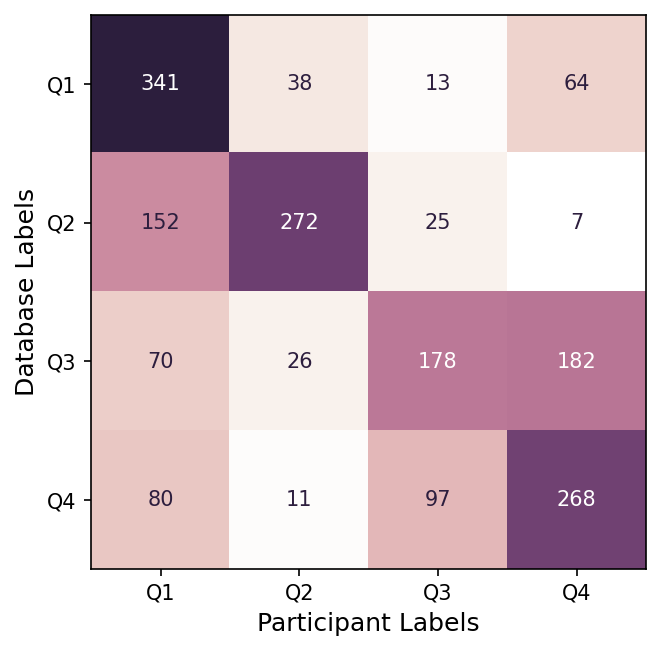

In [9]:
fig, ax = plt.subplots( dpi = 150)  

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

cm_display = ConfusionMatrixDisplay.from_predictions(labels_df['db_labels'],  labels_df['p_labels'], cmap=cmap,colorbar=False, ax = ax)

# Adjust font size for label names
cm_display.ax_.tick_params(axis='both', labelsize=10)

# Adjust font size for axis labels
cm_display.ax_.set_xlabel('Participant Labels', fontsize=12)
cm_display.ax_.set_ylabel('Database Labels', fontsize=12)

In [8]:
# Extract confusion matrix values and labels
confusion_matrix_values = cm_display.confusion_matrix
unique_labels = cm_display.display_labels

# Create a DataFrame from the confusion matrix
confusion_matrix_df = pd.DataFrame(data=confusion_matrix_values, index=unique_labels, columns=unique_labels)

# Now 'confusion_matrix_df' contains the confusion matrix as a DataFrame
confusion_matrix_df

,Q1,Q2,Q3,Q4
Q1,341,38,13,64
Q2,152,272,25,7
Q3,70,26,178,182
Q4,80,11,97,268
